# Analysis of bank clients churn

## Project description 
Analyze clients of a regional bank and identify segments of clients who tend to leave the bank.
Conduct an exploratory analysis of the data, identify all significant signs of churn (intervals of characteristic values ​​that are associated with increased churn, compare the portraits of typical clients who are inclined and not inclined to leave the bank, etc.)

Formulate and test statistical hypotheses.
Test the hypothesis of income differences between those clients who left and those who stayed.
Formulate and test a statistical hypothesis regarding the presented data, which will help clarify the study
By combining signs of churn, form segments, select the best ones from them and give recommendations on them

**Project goal**  
Major goal is to help a bank! Acquiring new clients is costly; it's more economical to retain those we already know and work with. Our marketing department lacks automated mailing systems, so each client receives a manually crafted letter. Therefore, it's crucial for the marketing team to identify compact, homogeneous segments and provide examples of initiatives that can either win back clients or prevent those on the fence from leaving the bank.

**Who is interested in results of the analysis**  
Marketing manager and the bank

**What decisions will be made based on your analysis?**   
  A strategy to retain existing customers will be developed. 

## Data description

Dataset has date about "Metanprom" bank clients. The bank operates in Yaroslavl, Rostov and Rybinsk (Russia).

Columns:  
`USERID` — user id,  
`score` — credit score,  
`city` — city,  
`gender` — sex,  
`age` — age,  
`equity` — tenure rate,    
`balance` — balance,  
`products` — number of products which a client uses (at least 1),  
`credit_card` — 1 means a client has credit card, 0 - they don't,  
`last_activity` — 1 means client is active, 0 means they are not,  
`EST_SALARY` — clients extimated salary (calculated by a model),  
`сhurn` — 1 means a client is leaving, 0 a client is staying  

## Project plan

 
**1. Data Loading and Preprocessing** 

- Load the data;  
- Rename columns as needed;
- Convert data types to the appropriate formats (if necessary); 
- Identify and handle duplicates;
- Analyze missing values and choose the optimal strategy for handling them based on their correlation with other parameters;  
- Detect and address any outliers (if necessary);
- Encode categorical variables (e.g., city and gender).  

**2. Exploratory Data Analysis**   
- Compare profiles of typical clients by calculating averages and medians for both churned and non-churned customers  
- Analyze continuous variables in relation to churn, visualizing the results using histograms 
- Examine categorical features in the context of churn through bar charts 
- Analyze correlations between parameters and visualize them. Based on this analysis, we'll identify key features associated with customer churn 

**3. Hypothesis testing**
- Test Hypothesis 1 regarding the difference in income (est_salary column) between customers who left and those who stayed:
H0: The average income of customers who left is equal to that of customers who stayed   
H1: The average income of customers who left is not equal to that of customers who stayed.  
- Formulate and test additional hypotheses based on the results of the EDA.

**4. Interim conclusions**
- Summarize which indicators strategically influence churn (identify the key features that influence churn and determine which values or ranges of these features are associated with churn).

**5. Segmentation based on strategic indicators**  
- Identify and prioritize high-churn segments, where the churn rate is more than twice the average for the bank. Segment sizes range from 300 to 2,000 people.

**6. Conclusions and recommendations**  

- Provide recommendations for each segment on potentially effective measures to either win back customers or prevent those on the fence from leaving.



**Presentation of the analysis is [here](https://drive.google.com/file/d/1SpPU3bMvfsboYPKhuEhayYj91Q8JKAlR/view?usp=drive_link)**


## Data Loading and Preprocessing

- Load the data;  
- Rename columns as needed;
- Convert data types to the appropriate formats (if necessary); 
- Identify and handle duplicates;
- Analyze missing values and choose the optimal strategy for handling them based on their correlation with other parameters;  
- Detect and address any outliers (if necessary);
- Encode categorical variables (e.g., city and gender).    

**File path**

`https://code.s3.yandex.net/datasets/bank_scrooge.csv`. [Load the dataset](https://code.s3.yandex.net/datasets/bank_scrooge.csv)


In [1]:
#load libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import phik
from phik.report import plot_correlation_matrix
from phik import report
import math as mth
from statsmodels.stats.proportion import proportions_ztest

/Users/darianechaeva/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id=' загрузка_данных'></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
**************************************************


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9953,132990,760.0,Ярославль,Ж,28.0,1,131814.69,1,1,1,67612.85,0
3850,154385,870.0,Ярославль,М,29.0,3,810607.10,2,1,1,97994.95,1
4962,149952,934.0,Ярославль,М,36.0,5,2861593.56,2,1,0,233549.17,0
3886,159978,912.0,Ярославль,Ж,46.0,0,NaN,1,0,0,196640.31,0
5437,174638,805.0,Ярославль,М,45.0,3,1035139.90,2,0,0,201969.80,0


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


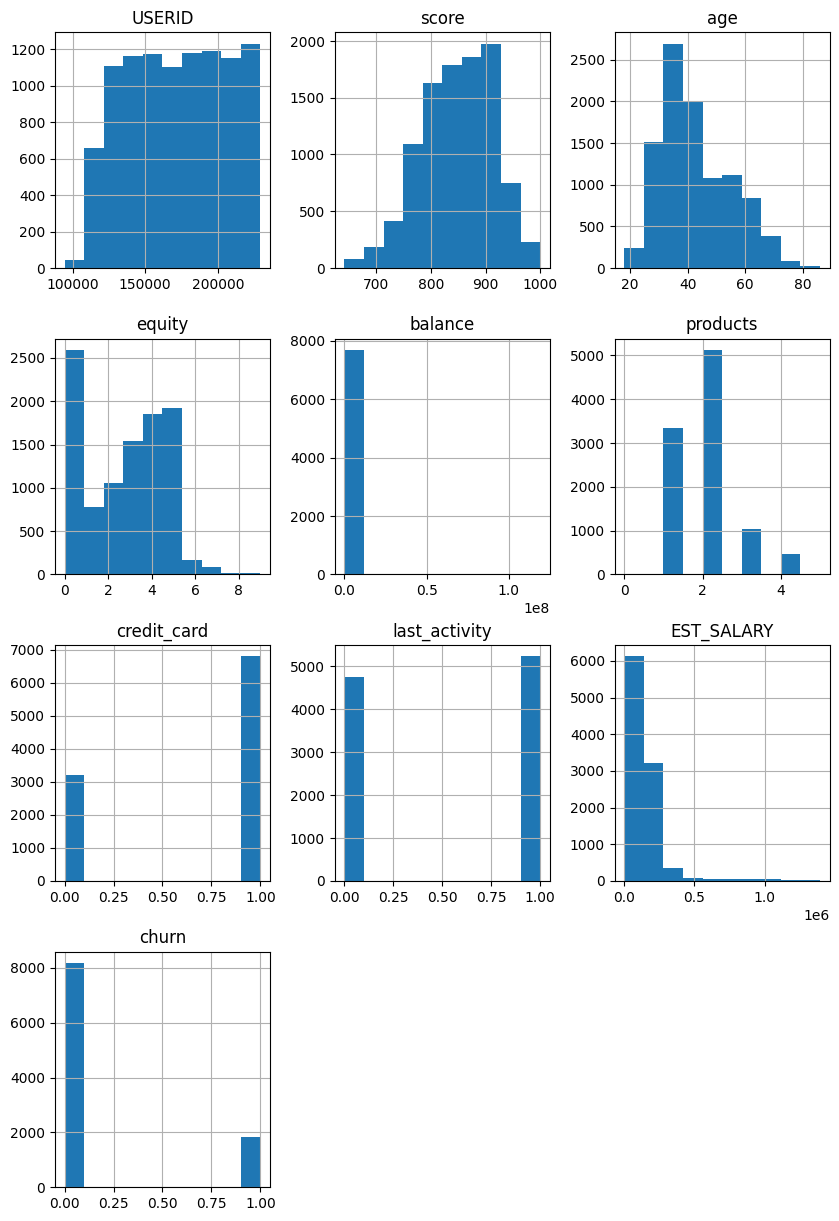

''

In [2]:
#load the data
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
    
except:
    df = pd.read_csv('/datasets/bank_scrooge.csv')     
    
#display info about the data  
def print_info_and_sample(df):
    df.info()
    print('*'*50)
    display(df.sample(5, random_state=1))
    display(df.describe())
    
print_info_and_sample(df)  
df.hist(figsize=(10, 15))
plt.show()
;

In [3]:

print(f'\033[1mNumber of unique users: {df["USERID"].nunique()}\033[1m') 

Number of unique users: 9927


Observations from dataframe exemination:  

- The dataframe contains 10,000 rows, with 9,927 unique USER IDs, indicating that some clients share the same user ID. It is known that IDs can be reassigned to new clients after previous clients leave the bank.
- The bank's clients are both men and women aged between 18 and 86, with varying balances and incomes (the distributions have a long tail to the right). The maximum number of products held by any user is 5.  

Preprocessing steps needed:  
- The column names need to be standardized.
- No data type conversion is necessary.
- Since the dataset includes only current bank clients and the information is up-to-date, the 'products' column should not contain zero values. 
- Therefore, clients with 0 in the 'products' column should be removed.
- There are missing values in the 'age' and 'balance' columns. These gaps need to be addressed due to their significant number.
- The columns with object data types also need to be encoded. 

### Preprocessing

#### Columns names change

In [4]:
# change columns names
df.columns = [x.lower() for x in df.columns]

#### Drop anomalous value in products

It is known a priori that our dataset includes only bank clients who have at least one product, so we will delete any rows where products = 0.  

Regarding other columns, such as balance and est_salary, which have a long tail on the right, we will not consider these as anomalies since it is possible for individuals to have higher salaries and larger balances.

In [5]:
# delete rows where product = 0
df = df[df['products'] != 0]

#### Duplicates

In [6]:
# check df for duplicates
print('\033[1mNumber of identical duplicates in df based on columns userid, score:\033[1m', \
    df.duplicated(keep=False, subset=['userid', 'score']).sum())

display(df[df.duplicated(keep=False, subset=['userid', 'score'])])

Number of identical duplicates in df based on columns userid, score: 6


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4343,141945,929.0,Рыбинск,М,33.0,0,NaN,1,1,0,381868.89,0
6446,222480,776.0,Ярославль,Ж,38.0,5,823145.83,2,1,1,55777.44,0
9104,222480,776.0,Рыбинск,Ж,NaN,5,796735.09,1,1,1,55073.63,0
9322,221809,917.0,Рыбинск,М,45.0,0,NaN,1,1,1,199728.29,0
9457,141945,929.0,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0
9634,221809,917.0,Ярославль,М,NaN,0,NaN,1,1,1,192644.15,0


When examining identical duplicates in columns userid and score, it is clear the those clients are currently the bank clients. Even though rows are not 100% identical (balance and est_salary columns), data in the rows looks similar. Therefore we will delete the duplicates (3 rows)

In [7]:
# delete duplicates
df = df.drop_duplicates(subset=['userid', 'score'], keep='first')

Examine other columns for duplicates

In [8]:
# check df for duplicates
print('\033[1mNumber of identical duplicates in df based on columns userid, balance, last_activity:\033[1m', \
    df.duplicated(keep=False, subset=['userid', 'balance', 'last_activity']).sum())

display(df[df.duplicated(keep=False, subset=['userid', 'balance', 'last_activity'])].sort_values('userid', ascending=False))

Number of identical duplicates in df based on columns userid, balance, last_activity: 22


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6412,226550,939.0,Ярославль,М,34.0,0,NaN,1,1,1,145913.73,0
8070,226550,940.0,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0
1389,221156,687.0,Рыбинск,М,61.0,0,NaN,1,1,1,136361.72,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
1010,219343,921.0,Ярославль,Ж,33.0,0,NaN,1,1,0,159475.61,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
4401,216848,929.0,Рыбинск,М,68.0,0,NaN,1,1,1,195902.59,0
8293,216848,930.0,Ярославль,М,NaN,0,NaN,1,1,1,199542.51,0
6685,210898,934.0,Рыбинск,Ж,35.0,0,NaN,1,0,1,912105.84,0
8449,210898,805.0,Ярославль,Ж,NaN,0,NaN,1,0,1,922080.25,0


When searching for duplicates by columns with user ID, balance and activity, 22 duplicates were found. It looks like these users have different cities, but almost all duplicate rows by user ID demonstrate a close score and average income estimate. Each duplicate has missing data on age. Therefore, we will consider these rows duplicates and delete them

In [9]:
# delete duplicates
df = df.drop_duplicates(subset=['userid', 'balance', 'last_activity'], keep='first')

In [10]:
# check df for duplicates
print('\033[1mNumber of identical duplicates in df based on columns userid, age, gender, equity:\033[1m', \
    df.duplicated(keep=False, subset=['userid', 'age', 'gender', 'equity']).sum())

display(df[df.duplicated(keep=False, subset=['userid', 'age', 'gender', 'equity'])].sort_values('userid', ascending=False))

Number of identical duplicates in df based on columns userid, age, gender, equity: 2


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0


In [11]:
# delete duplicates
df = df.drop_duplicates(subset=['userid', 'age', 'gender', 'equity'], keep='first')

Examine userid и gender columns for duplicates

In [12]:
# show whole df
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

# check df for duplicates
print('\033[1mNumber of identical duplicates in df based on columns userid, gender:\033[1m', \
    df.duplicated(keep=False, subset=['userid', 'gender']).sum())

display(df[df.duplicated(keep=False, subset=['userid', 'gender'])].sort_values('userid', ascending=False))

Number of identical duplicates in df based on columns userid, gender: 52


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
440,221197,663.0,Рыбинск,М,27.0,0,NaN,1,1,1,172573.13,0
8632,221197,893.0,Ярославль,М,NaN,0,NaN,1,1,0,173929.92,0
1740,220816,840.0,Ярославль,Ж,41.0,3,1193287.13,2,1,1,76434.94,1
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
7409,214031,777.0,Ярославль,М,NaN,2,171510.23,1,1,1,75409.63,0
431,214031,856.0,Рыбинск,М,36.0,2,386426.67,4,1,1,72767.85,0


After examining the dataframe rows with identical information in the `userid` and `gender` columns, 52 duplicates were found. However, upon closer inspection, these rows show different incomes and varying or missing ages. Some of these rows might indeed be duplicates, but we cannot be certain. Since the number of such rows is small, accounting for only 0.3% of the data, this will not impact the further analysis. Therefore, we will not delete them.

In [13]:
print(f"\033[1mAfter deletion of duplicates we have {df.shape[0]} rows and {df['userid'].nunique()} unique users\033[1m")

After deletion of duplicates we have 9984 rows and 9926 unique users


After deletion of duplicates, we have 99.8% of the data left. We will check the dataframe for non-exact duplicates. We assume that non-exact duplicates may derive from different writing for cities or gender

In [14]:
# examine non-exact duplicates
# пcheck how cities and sex are written
display(df['city'].value_counts())
display(df['gender'].value_counts())


Ярославль    5880
Рыбинск      2687
Ростов       1417
Name: city, dtype: int64

М    4996
Ж    4988
Name: gender, dtype: int64

There are three cities in the dataframe, theay are written correct and cannot cause non-exact duplicates. Sex is recorded by 2 letters and cannot add non-exact duplicates.  
Below we will handle missing values. 

#### Handling missing values

In [15]:
# look at number of missing values
print(df.isna().sum())
print(((df.isna().sum() / df.shape[0]) * 100).apply(lambda x: f'{x:.2f}%'))

userid              0
score               0
city                0
gender              0
age                12
equity              0
balance          2281
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64
userid            0.00%
score             0.00%
city              0.00%
gender            0.00%
age               0.12%
equity            0.00%
balance          22.85%
products          0.00%
credit_card       0.00%
last_activity     0.00%
est_salary        0.00%
churn             0.00%
dtype: object


After removing identical duplicates, only 0.12% (12 rows) of missing values remain in the `age` column, so we will delete them. However, there are many missing values in the `balance` column, we need to investigate their nature and determine how to address them. To do this, we will convert `city` and `gender` from categorical object-type variables into numeric ones, allowing them to be included in the calculation of the correlation coefficient. Then, we will examine the correlation matrix between the parameters to determine if there is any relationship between `balance` and other columns.

In [16]:
# delete missing values in age column
df = df.dropna(subset=['age'])

#### Transform categorical into numeric values

In [17]:
# encoding of categprical values in'city' & 'gender'
dummies_gender = pd.get_dummies(df['gender'], drop_first= True)
dummies_city = pd.get_dummies(df['city'])

# merge new columns with original df
df = pd.concat([df, dummies_gender, dummies_city], axis=1)

df.columns = ['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'male_gender', 
       'rostov', 'yaroslavl', 'rybinsk'] # rename columns

display(df.sample(10, random_state=1))
# male_gender = 1, if a man and 0, if woman, rostov, yaroslavl, rybinsk = 1, if client lives in the city


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,male_gender,rostov,yaroslavl,rybinsk
4595,188890,973.0,Ростов,М,41.0,4,824283.10,2,0,0,123058.52,0,1,1,0,0
2434,197077,813.0,Рыбинск,Ж,32.0,5,182423.44,1,1,1,85652.33,0,0,0,1,0
6254,99111,826.0,Ростов,М,60.0,5,1333343.17,4,0,1,89817.02,1,1,1,0,0
8112,180074,840.0,Ростов,Ж,78.0,2,286195.86,2,0,0,37497.34,0,0,1,0,0
4655,149127,819.0,Ярославль,М,35.0,1,276986.61,1,1,0,30813.03,0,1,0,0,1
7064,121373,898.0,Рыбинск,М,33.0,0,NaN,1,1,0,154614.59,0,1,0,1,0
7103,181293,788.0,Рыбинск,Ж,57.0,1,186654.98,2,1,0,14335.29,0,0,0,1,0
5088,186891,989.0,Рыбинск,Ж,45.0,2,948274.54,2,0,1,60078.86,0,0,0,1,0
1874,193796,699.0,Рыбинск,М,32.0,0,NaN,3,1,0,88181.84,0,1,0,1,0
5323,116119,802.0,Ярославль,Ж,34.0,1,107805.91,1,1,1,227446.31,0,0,0,0,1


To find out if there is a correlation between the missing values ​​in the `balance` column and other variables in the dataset, we create a new column based on `balance`. The new column has "1" where there is a missing value in balance, and "0" where there is no missing value.

In [18]:
# create new column based on minning data in balance, 0 - not NaN, 1 - NaN
df['balance_null'] = df['balance'].isnull().astype(int)
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,male_gender,rostov,yaroslavl,rybinsk,balance_null
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,0,1,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1,0,0,1,0


In [19]:
# calculate correlation coefficient
df[['balance_null', 'age', 'churn', 'credit_card', 'equity', 'est_salary',\
                                                'last_activity', 'male_gender', 'products', 'rostov', 'rybinsk',\
                                                      'yaroslavl', 'score']].corr()

,balance_null,age,churn,credit_card,equity,est_salary,last_activity,male_gender,products,rostov,rybinsk,yaroslavl,score
balance_null,1.000000,-0.029266,-0.249505,0.157993,-0.709223,0.307172,0.028544,0.063101,-0.486014,-0.060543,0.056387,-0.014908,0.138481
age,-0.029266,1.000000,-0.050498,-0.122717,0.020559,-0.039378,-0.007925,-0.212572,0.017912,0.047101,-0.059493,0.028936,-0.012350
churn,-0.249505,-0.050498,1.000000,-0.130094,0.270094,0.001878,0.169652,0.141952,0.301285,0.005096,0.024340,-0.031019,0.106070
credit_card,0.157993,-0.122717,-0.130094,1.000000,-0.167245,0.035906,-0.033262,0.125902,-0.251580,-0.098048,0.114706,-0.050094,-0.095024
equity,-0.709223,0.020559,0.270094,-0.167245,1.000000,-0.171518,-0.002025,-0.020767,0.431118,0.035359,-0.020557,-0.005024,0.064782
est_salary,0.307172,-0.039378,0.001878,0.035906,-0.171518,1.000000,0.002818,0.082527,-0.117798,-0.105978,0.126155,-0.056556,0.164346
last_activity,0.028544,-0.007925,0.169652,-0.033262,-0.002025,0.002818,1.000000,-0.013087,0.037339,0.007180,-0.048925,0.048634,-0.030185
male_gender,0.063101,-0.212572,0.141952,0.125902,-0.020767,0.082527,-0.013087,1.000000,-0.022392,-0.014691,0.023906,-0.014961,0.011421
products,-0.486014,0.017912,0.301285,-0.251580,0.431118,-0.117798,0.037339,-0.022392,1.000000,-0.006976,0.042686,-0.041873,-0.003660
rostov,-0.060543,0.047101,0.005096,-0.098048,0.035359,-0.105978,0.007180,-0.014691,-0.006976,1.000000,-0.487054,-0.246753,-0.037514


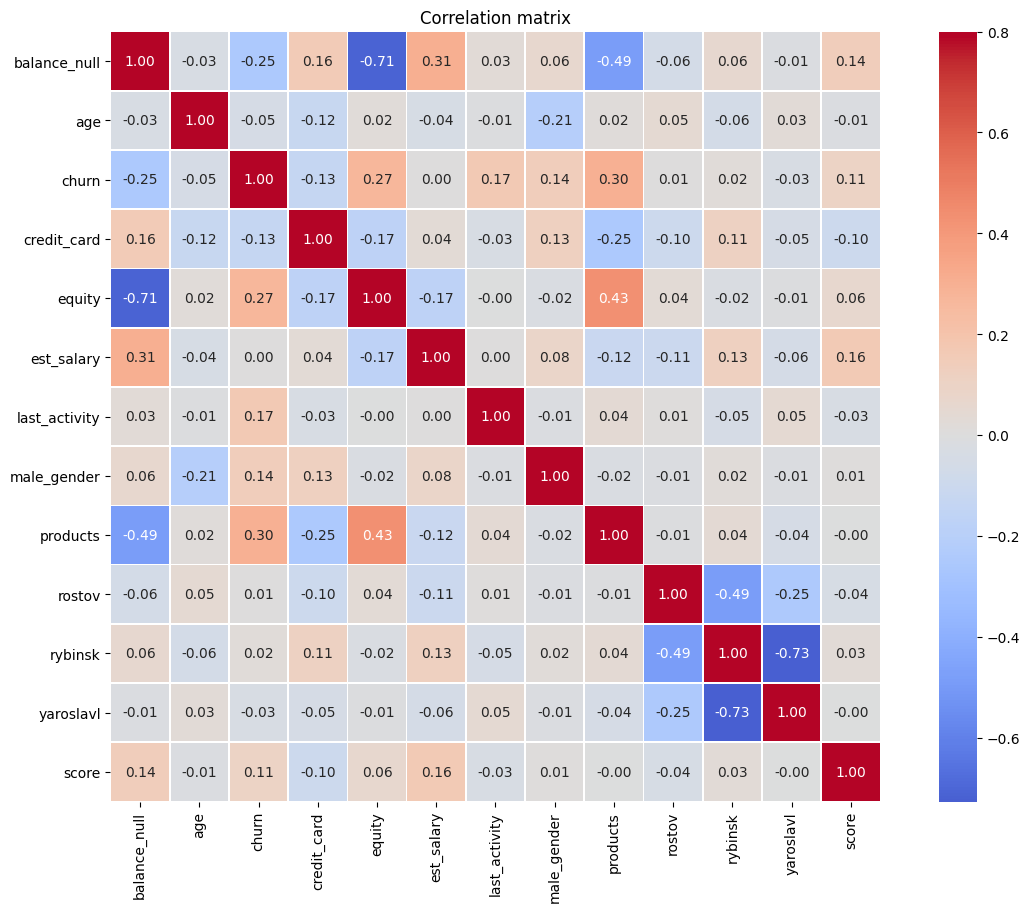

In [20]:
# visualization of correlation
f, ax = plt.subplots(figsize=(15, 10))
pirson_corr = df[['balance_null', 'age', 'churn', 'credit_card', 'equity', 'est_salary',\
                                                'last_activity', 'male_gender', 'products', 'rostov', 'rybinsk',\
                                                      'yaroslavl', 'score']].corr()
sns.heatmap(pirson_corr, vmax=.8, fmt=".2f", square=True, annot=True, linewidth=.5, cmap='coolwarm', center=0)
plt.title('Correlation matrix')
plt.show();

''

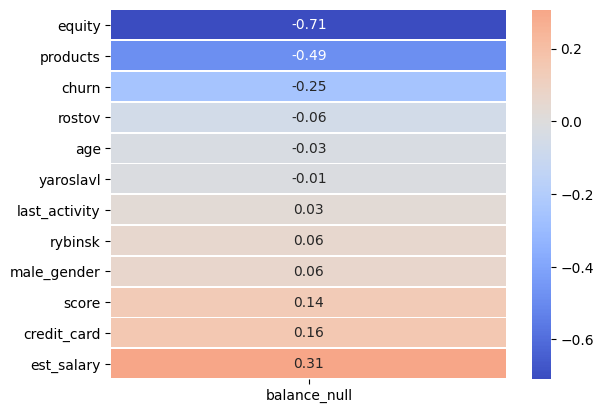

In [21]:
sns.heatmap(pirson_corr.loc[:,['balance_null']].drop('balance_null').sort_values('balance_null'), annot=True, fmt = '.2f', linewidth=.5, cmap='coolwarm', center=0)
;

In [22]:
# build a pivot table and calculatecantral tendency
# mean is calculated for continuous parameters, median - for discreate or those continuous which have outliers
df.pivot_table(columns='balance_null', values=['age', 'churn', 'credit_card', 'equity', 'est_salary',\
                                                'last_activity', 'male_gender', 'products', 'rostov', 'rybinsk',\
                                                      'yaroslavl', 'score'], aggfunc=['mean', 'median'])

mean                    median            
balance_null               0              1          0           1
age                42.925526      42.076822      40.00      40.000
churn               0.234728       0.005268       0.00       0.000
credit_card         0.640109       0.815628       1.00       1.000
equity              3.394983       0.050044       4.00       0.000
est_salary     124523.150369  226433.776313  106250.34  174354.235
last_activity       0.515207       0.549166       1.00       1.000
male_gender         0.483234       0.558385       0.00       1.000
products            2.081232       1.163740       2.00       1.000
rostov              0.153496       0.103161       0.00       0.000
rybinsk             0.573954       0.640035       1.00       1.000
score             843.744736     865.314750     840.00     903.000
yaroslavl           0.272550       0.256804       0.00       0.000

Based on the correlation matrix and the summary table above, it is evident that the missing values in the `balance` column are strongly correlated with `equity` and weakly correlated with `products` (correlation assessed using the Chaddock scale). The summary table also shows that `est_salary` and `gender` vary depending on whether there is a missing value in the `balance` column. This indicates that the missing values in the `balance` column are classified as MNAR (Missing Not At Random) — within each group in the dataset, the distribution of missing values depends on other variables. Such missing values can either be discarded or modeled to account for their nature and relationship with other parameters. Since the number of these missing values is quite large (more than 20% of the data), we will not discard them but will leave them unchanged and proceed to the exploratory data analysis.

### Change the data type for age and credit rating and look at the data after preprocessing

In [23]:
#change data type for age and score to integer
df[['age', 'score']] = df[['age', 'score']].astype(int)

# look at the date after preprocessing
print_info_and_sample(df)  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9972 non-null   int64  
 1   score          9972 non-null   int64  
 2   city           9972 non-null   object 
 3   gender         9972 non-null   object 
 4   age            9972 non-null   int64  
 5   equity         9972 non-null   int64  
 6   balance        7694 non-null   float64
 7   products       9972 non-null   int64  
 8   credit_card    9972 non-null   int64  
 9   last_activity  9972 non-null   int64  
 10  est_salary     9972 non-null   float64
 11  churn          9972 non-null   int64  
 12  male_gender    9972 non-null   uint8  
 13  rostov         9972 non-null   uint8  
 14  yaroslavl      9972 non-null   uint8  
 15  rybinsk        9972 non-null   uint8  
 16  balance_null   9972 non-null   int64  
dtypes: float64(2), int64(9), object(2), uint8(4)
memory 

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,male_gender,rostov,yaroslavl,rybinsk,balance_null
4595,188890,973,Ростов,М,41,4,824283.10,2,0,0,123058.52,0,1,1,0,0,0
2434,197077,813,Рыбинск,Ж,32,5,182423.44,1,1,1,85652.33,0,0,0,1,0,0
6254,99111,826,Ростов,М,60,5,1333343.17,4,0,1,89817.02,1,1,1,0,0,0
8112,180074,840,Ростов,Ж,78,2,286195.86,2,0,0,37497.34,0,0,1,0,0,0
4655,149127,819,Ярославль,М,35,1,276986.61,1,1,0,30813.03,0,1,0,0,1,0


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,male_gender,rostov,yaroslavl,rybinsk,balance_null
count,9972.000000,9972.000000,9972.000000,9972.000000,7.694000e+03,9972.000000,9972.000000,9972.000000,9.972000e+03,9972.00000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000
mean,171751.997493,848.672182,42.731649,2.630866,8.273107e+05,1.871641,0.680205,0.522964,1.478036e+05,0.18231,0.500401,0.141998,0.268953,0.589049,0.228440
std,33693.381286,65.396360,12.175463,1.980150,1.980448e+06,0.792585,0.466421,0.499497,1.392933e+05,0.38612,0.500025,0.349065,0.443438,0.492031,0.419848
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142750.500000,802.000000,33.000000,0.000000,2.956339e+05,1.000000,0.000000,0.000000,7.525190e+04,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.243565e+05,2.000000,1.000000,1.000000,1.196489e+05,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,201163.250000,900.000000,51.000000,4.000000,9.803785e+05,2.000000,1.000000,1.000000,1.745005e+05,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data preprocessing. Interim conclusion  
- The dataframe contains 10,000 rows, with 9,927 unique USER IDs, indicating that some clients share the same user ID. It is known that IDs can be reassigned to new clients after previous clients leave the bank.
- The bank's clients are both men and women aged between 18 and 86, with varying balances and incomes (the distributions have a long tail to the right). The maximum number of products held by any user is 5.  

The following has been done in preprocessing: 
- deleted rows where number of products = 0. Regarding other columns, such as balance and est_salary, which have a long tail on the right, we have not considered these as anomalies since it is possible for individuals to have higher salaries and larger balances. 
- examined and deleted duplicates. As a result, we have 99.8% of the data left. Under closer examination, it was decided not to remove all records that seemed to be duplicates due to differences in the columns records. Moreover, we checked that there were not non-exact duplicates in the dataframe considering city and gender columns.
- Identical duplicates processing. After deletion of identical duplicates, only 0.12% (12 rows) of missing values remained in the `age` column, so we deleted them. However, there were many missing values in the `balance` column, therefore, we investigated their nature first.  
Based on the correlation matrix and the summary table, it was clear that the missing values in the `balance` column were strongly correlated with `equity` and weakly correlated with `products` (correlation assessed using the Chaddock scale). The summary table also showed that `est_salary` and `gender` vary depending on whether there was a missing value in the `balance` column. As a result, the missing values in the `balance` column were classified as MNAR (Missing Not At Random) — within each group in the dataset, the distribution of missing values depends on other variables. Since the number of these missing values is quite large (more than 20% of the data), they were left unchanged.


## Exploratory Data Analysis
 
- Compare profiles of typical clients by calculating averages and medians for both churned and non-churned customers  
- Analyze continuous variables in relation to churn, visualizing the results using histograms 
- Examine categorical features in the context of churn through bar charts 
- Analyze correlations between parameters and visualize them. Based on this analysis, we'll identify key features associated with customer churn 

### Typical clients profile comparison (calculate averages and medians for both churned and non-churned customers)  

In [24]:
# Examine bank clients portraits throught pivot table
portrait = df.pivot_table(index='churn', values=['userid', 'score', 'male_gender', 'age', 'equity', 'balance', 'products',\
                                                  'credit_card','last_activity', 'est_salary', 'rostov', 'yaroslavl', 'rybinsk'],
               aggfunc={'userid':"count",
                        'score': "mean",
                        'male_gender':"mean",
                        'age':"mean",
                        'equity':"median",
                        'balance':"median",
                        'products':"median",
                        'credit_card':"mean",
                        'last_activity':"mean",
                        'est_salary':"median",
                        'rostov':"sum",
                        'yaroslavl':"sum",
                        'rybinsk':"sum"}).reset_index()
  

# columns formatting

portrait['balance'] = portrait['balance'].apply(lambda x: f'{x:,.0f}')
portrait['est_salary'] = portrait['est_salary'].apply(lambda x: f'{x:,.0f}')
portrait['age'] = portrait['age'].apply(lambda x: f'{x:.1f}')
portrait['score'] = portrait['score'].apply(lambda x: f'{x:.1f}')
portrait['yaroslavl'] = portrait['yaroslavl'].apply(lambda x: f'{x:.0f}')
portrait['rostov'] = portrait['rostov'].apply(lambda x: f'{x:.0f}')
portrait['rybinsk'] = portrait['rybinsk'].apply(lambda x: f'{x:.0f}')
portrait['credit_card'] = portrait['credit_card'].apply(lambda x: f'{x:.2f}')
portrait['last_activity'] = portrait['last_activity'].apply(lambda x: f'{x:.2f}')
portrait['male_gender'] = portrait['male_gender'].apply(lambda x: f'{x:.2f}')

portrait = portrait[['churn', 'userid', 'age', 'male_gender', 'yaroslavl', 'rostov', 'rybinsk', 'score', 'balance', \
                     'est_salary', 'equity', 'credit_card', 'products', 'last_activity']]
portrait.columns = ["Churn class", "Number of clients", "Mean age", "Men ratio", "Number of clients in Yaroslavl", "Number of clients in Rostov",\
                     "Number of clients in Rybinsk", "Mean score", "Median balance", "Median salary", "Median equity", \
                    "Mean credit card number", "Median number of products", "Active clients ratio"]
portrait['Churn class'] = portrait['Churn class'].replace({0: 'churners', 1: 'non-churners'}) #replace values

portrait.T

,0,1
Churn class,churners,non-churners
Number of clients,8154,1818
Mean age,43.0,41.4
Men ratio,0.47,0.65
Number of clients in Yaroslavl,2246,436
Number of clients in Rostov,1151,265
Number of clients in Rybinsk,4757,1117
Mean score,845.4,863.4
Median balance,"475,438","783,909"
Median salary,"118,234","125,409"


- Dataset has data for 3 cities. Highest number of clients the bank has in Rybinsk, then Yaroslavl and Rostov.  
- Mean clients age is between 41-43 years    
- There are more men amng leaving clients rather than women. For staying clients, the case is opposite  
- Mean credit score is 840 - 860 points    
- Mean salary for leaving clients is higher than for staying clinets: 118k - 125k. Balance is also higher for leaving clients (780k whereas for staying clients it is 475k)      
- Median equity for leaving clients is 4, for staying it is 3.   
- Mean number of credit cards for leaving clients is 0,71 and for staying is 0,55.  
- On average, bank clients have 2 products    
- Active clients ratio is higher for leaving clients (0,70 vs 0,48 for staying)   

### Analyze continuous variables in relation to churn, visualizing the results using histograms

In [25]:
def create_histogram(df, column_name, bins):
    """
    The function builds normalized histogramms using a dataframe column.
    The funclition takes a dataframe (df) and   
    the name of the column (column_name) for which a histogram needs to be ptotted as input 
    """
    df_copy = df.copy() #create df copy to avoid original values replacement

    # make a replacement for churn column
    df_copy['churn'] = df_copy['churn'].map({0: 'Non-churners', 1: 'Churners'})
    fig = px.histogram(df_copy, 
                       x=column_name, 
                       color='churn', 
                       title=f'The distribution of {column_name} based on churn class', 
                       nbins=bins,
                       histnorm='probability density',
                       barmode='overlay',
                       category_orders={'churn': ['Churners', 'Non-churners']})
    fig.update_xaxes(title_text='Value')
    fig.update_yaxes(title_text='Frequency')
    fig.update_layout(legend_title_text='Churn class')
    fig.show()

create_histogram(df, 'score', 70)  
create_histogram(df, 'age', 100)
create_histogram(df[df['balance'] <= 4000000], 'balance', 70)
create_histogram(df[df['est_salary'] <= 400000], 'est_salary', 100)

The distribution of continuous variables, illustrated by histograms, reveals that:

- Churners tend to have a credit rating between 830 and 930. Although the specific credit rating scale used for our clients is unknown, the dataset shows a range from 640 to 1000, indicating that these clients generally have an above-average credit score.
- There is a higher proportion of churners in the age groups 25 to 35 and 50 to 60 years old (young or middle-aged individuals, likely employed).
- A balance of 750k and above is typical for clients who are more likely to leave the bank.
- Churners typically have a salary of 100k or more.  

In summary, the bank is losing affluent, employed clients who are young or middle-aged and have strong credit ratings.

### Examine categorical features in the context of churn through bar charts 


,city,non-churners,churners,churn rate,mean churn rate in df
0,Ростов,1151,265,0.187147,0.18231
1,Рыбинск,2246,436,0.162565,0.18231
2,Ярославль,4757,1117,0.190160,0.18231


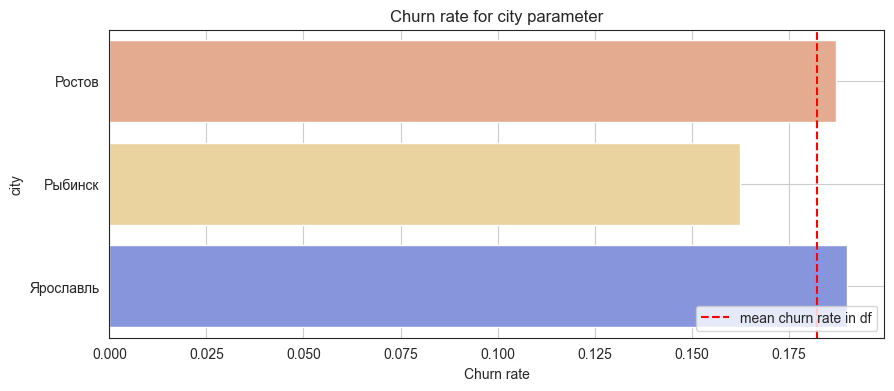

In [26]:
def create_barplot(df, column_name):
    """
    This function builds bar charts based on a dataframe column.
    The function takes as input a dataframe (df) and
    the name of the column (column_name) for which a chart needs to be built
    """
    #create a pivot table
    pivot = df.pivot_table(index=column_name, columns='churn', values='userid', aggfunc='count').reset_index()
    pivot.columns=[column_name, 'non-churners', 'churners']
    pivot['churn rate'] = pivot['churners'] / (pivot['churners'] + pivot['non-churners'])
    pivot['mean churn rate in df'] = df['churn'].mean()
    display(pivot)
    #create a bar chart
    sns.set_style('white') # set style from seaborn
    custom_palette = ["#f3a683", "#f7d794", "#778beb", "#e77f67", "#cf6a87", "#786fa6", "#f8a5c2", "#63cdda", "#ea8685", "#596275"]
    sns.set_palette(custom_palette)
    # set graph size
    plt.figure(figsize=(10, 4))
    # create a bar chart with seaborn
    sns.barplot(x='churn rate', y=column_name, data=pivot)
    # add vertical line for 'mean churn rate in df'
    plt.axvline(x=pivot['mean churn rate in df'].iloc[0], color='red', linestyle='--', label='mean churn rate in df')
    # set plot title and labels for x and y axes 
    plt.title(f'Churn rate for {column_name} parameter')
    plt.xlabel('Churn rate')
    plt.ylabel(column_name)
    # set legend position and fontsize
    plt.legend(loc='lower right', fontsize=10)
    # grid
    plt.grid()
    # show the graph
    plt.show()
    


create_barplot(df, 'city')

The breakdown of churn by city shows that the proportion of churners is higher in Yaroslavl (19%) and Rostov (19%) compared to the dataset average of 18%. In Rybinsk, the churn rate is lower at 16%.

,gender,non-churners,churners,churn rate,mean churn rate in df
0,Ж,4347,635,0.127459,0.18231
1,М,3807,1183,0.237074,0.18231


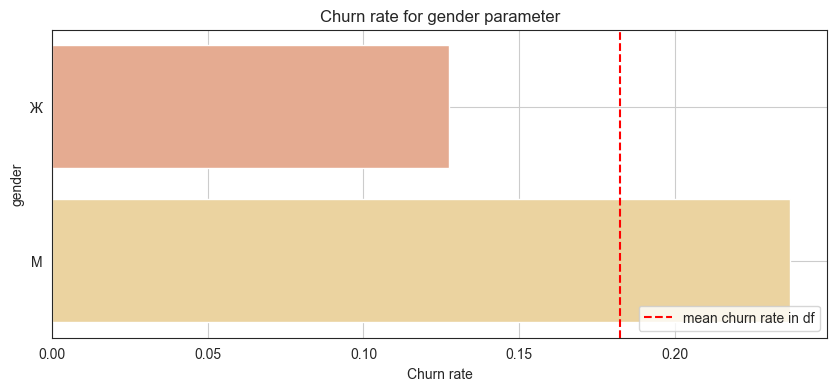

In [27]:
create_barplot(df, 'gender')

Churners ratio is higher for men (24%) compared to women (13%).

,credit_card,non-churners,churners,churn rate,mean churn rate in df
0,has a credit card,5780,1003,0.147870,0.18231
1,has no credit card,2374,815,0.255566,0.18231


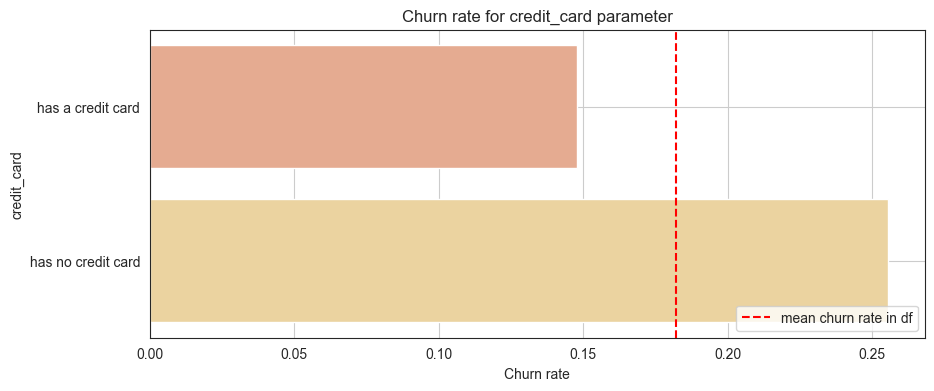

In [28]:
credit_card = df.copy(deep=False)
credit_card['credit_card'] = credit_card['credit_card'].replace({0: 'has no credit card', 1: 'has a credit card'})
create_barplot(credit_card, 'credit_card')

Churned customers tend not to have a credit card, as shown in the graph above. The churn rate is 26% among customers without a credit card, compared to 15% among those who do have one.

,last_activity,non-churners,churners,churn rate,mean churn rate in df
0,active,3938,1277,0.244871,0.18231
1,not active,4216,541,0.113727,0.18231


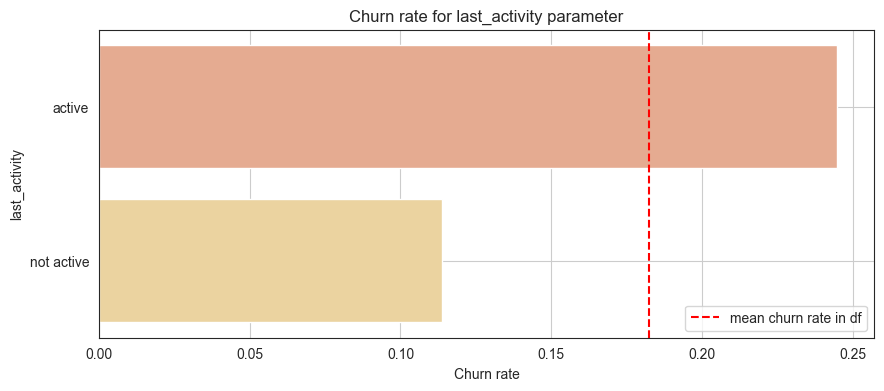

In [29]:
activity = df.copy(deep=False)
activity['last_activity'] = activity['last_activity'].replace({0: 'not active', 1: 'active'})
create_barplot(activity, 'last_activity')

Activity over the last three months shows that there are more churners among active customers (24%) versus 11% among inactive customers

,products,non-churners,churners,churn rate,mean churn rate in df
0,1,3088,235,0.070719,0.18231
1,2,4140,978,0.191090,0.18231
2,3,741,297,0.286127,0.18231
3,4,174,300,0.632911,0.18231
4,5,11,8,0.421053,0.18231


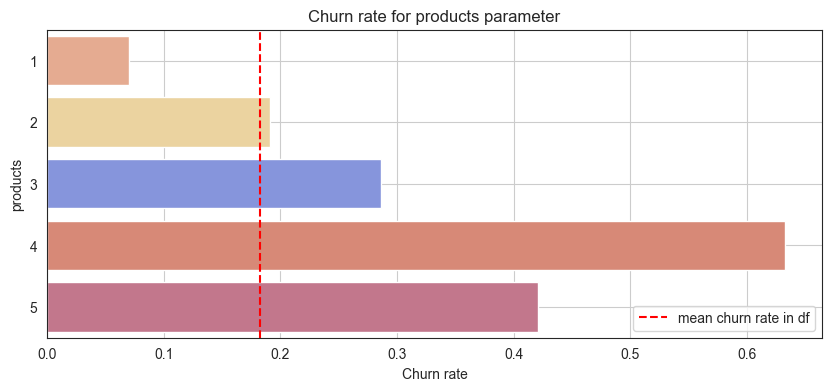

In [30]:
products = df.copy(deep=False)
products['products'] = products['products'].replace({1: '1', 2: '2', 3: '3', 4: '4', 5: '5'}) #replace numbers by text for the graph
create_barplot(products, 'products')

The churn rate is highest among customers with 4 products, reaching 63%. It is also above the dataset average for customers with 2, 3, and 5 products.

,equity,non-churners,churners,churn rate,mean churn rate in df
0,0,2486,90,0.034938,0.18231
1,1,680,93,0.120310,0.18231
2,2,884,166,0.158095,0.18231
3,3,1219,321,0.208442,0.18231
4,4,1383,464,0.251218,0.18231
5,5,1339,576,0.300783,0.18231
6,6,103,58,0.360248,0.18231
7,7,43,37,0.462500,0.18231
8,8,11,6,0.352941,0.18231
9,9,6,7,0.538462,0.18231


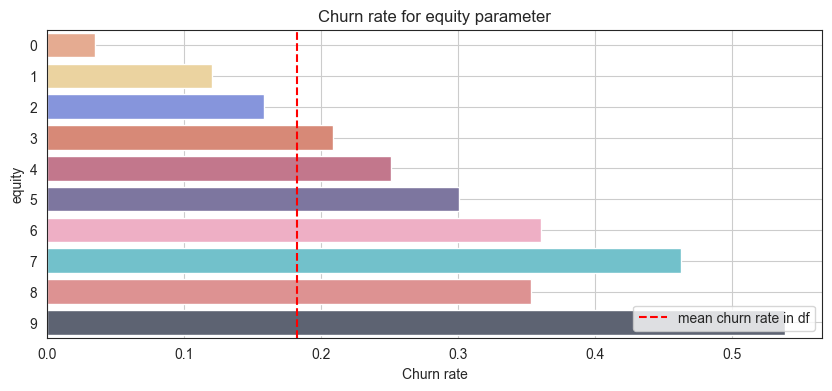

In [31]:
equity = df.copy(deep=False)
equity['equity'] = equity['equity'].replace({1: '1', 2: '2', 3: '3', 4: '4', 5: '5',  6: '6',  7: '7',  8: '8',  9: '9'}) #replace numbers by text for the graph
create_barplot(equity, 'equity')

The churn rate increases almost linearly as equity scores rise. Starting from a score of 3, the churn rate surpasses the bank's average. At a score of 9, the churn rate reaches 54%, which is three times higher than the bank’s average.

### Correlations between parameters and their visualization

In [32]:
interval_cols = ['score', 'age', 'balance', 'est_salary']
phik_overview = df[['score', 'yaroslavl', 'rybinsk', 'rostov', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']].phik_matrix(interval_cols=interval_cols)
phik_overview

/Users/darianechaeva/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/darianechaeva/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/darianechaeva/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/darianechaeva/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 i

,score,yaroslavl,rybinsk,rostov,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
score,1.000000,0.029813,0.084765,0.085634,0.070752,0.034132,0.527425,0.170882,0.419611,0.208218,0.051576,0.395103,0.229597
yaroslavl,0.029813,1.000000,0.908749,0.377218,0.016978,0.057812,0.000000,0.023173,0.085320,0.076640,0.074329,0.101202,0.045614
rybinsk,0.084765,0.908749,1.000000,0.692163,0.033739,0.094620,0.055020,0.047930,0.108415,0.178200,0.074830,0.175510,0.034387
rostov,0.085634,0.377218,0.692163,1.000000,0.016263,0.067246,0.064474,0.000000,0.044969,0.152137,0.000000,0.135920,0.000000
gender,0.070752,0.016978,0.033739,0.016263,1.000000,0.286123,0.063639,0.045449,0.071776,0.195544,0.012739,0.144200,0.220203
age,0.034132,0.057812,0.094620,0.067246,0.286123,1.000000,0.046202,0.019181,0.140902,0.157117,0.090453,0.359726,0.192521
equity,0.527425,0.000000,0.055020,0.064474,0.063639,0.046202,1.000000,0.000000,0.583278,0.221394,0.050776,0.285485,0.352104
balance,0.170882,0.023173,0.047930,0.000000,0.045449,0.019181,0.000000,1.000000,0.000000,0.000000,0.000000,0.374366,0.024666
products,0.419611,0.085320,0.108415,0.044969,0.071776,0.140902,0.583278,0.000000,1.000000,0.271071,0.112811,0.222196,0.259848
credit_card,0.208218,0.076640,0.178200,0.152137,0.195544,0.157117,0.221394,0.000000,0.271071,1.000000,0.049452,0.038387,0.201919


''

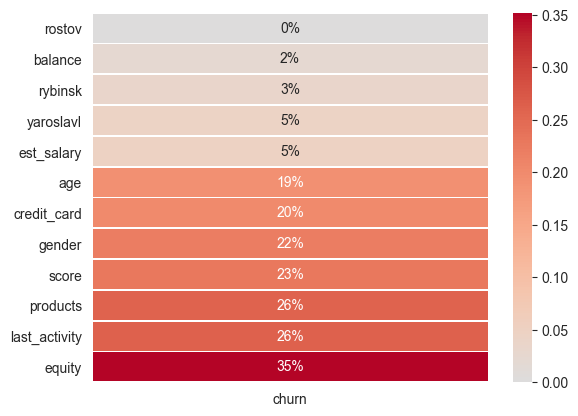

In [33]:
sns.heatmap(phik_overview.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt = '.0%', linewidth=.5, cmap='coolwarm', center=0)
;

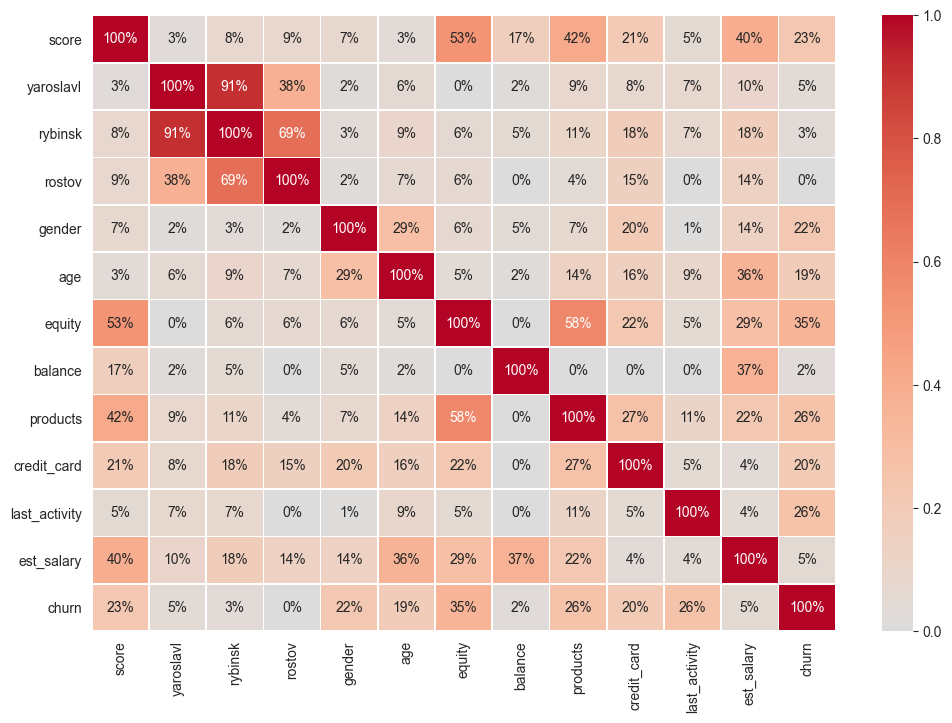

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(phik_overview, annot=True, fmt = '.0%', linewidth=.5, cmap='coolwarm', center=0);

The correlation analysis was performed using the Phik library. Unlike Pearson correlation, this library can detect nonlinear relationships between variables, though it does not indicate the direction of the dependency. The correlation matrix (interpreted using the Chaddock scale) shows a moderate correlation between equity scores and both the number of products and credit rating. A weak correlation is observed between credit rating, age, and customer balance with estimated salary, as well as between churn and equity scores. For other indicators, the correlations are negligible.

## Hypothesis testing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9972 non-null   int64  
 1   score          9972 non-null   int64  
 2   city           9972 non-null   object 
 3   gender         9972 non-null   object 
 4   age            9972 non-null   int64  
 5   equity         9972 non-null   int64  
 6   balance        7694 non-null   float64
 7   products       9972 non-null   int64  
 8   credit_card    9972 non-null   int64  
 9   last_activity  9972 non-null   int64  
 10  est_salary     9972 non-null   float64
 11  churn          9972 non-null   int64  
 12  male_gender    9972 non-null   uint8  
 13  rostov         9972 non-null   uint8  
 14  yaroslavl      9972 non-null   uint8  
 15  rybinsk        9972 non-null   uint8  
 16  balance_null   9972 non-null   int64  
dtypes: float64(2), int64(9), object(2), uint8(4)
memory 

### **Hypothesis №1** 
We will test the hypothesis regarding the equality of the average income between customers who left and those who stayed:

- The null hypothesis states that the average income is the same for both groups (churners and non-churners).
- The alternative hypothesis suggests that the average income differs between the two groups.

We will perform the hypothesis test using both a t-test and a U-test.

**First, we’ll apply a t-test** to compare the true means of the two populations. Specifically, we'll use a two-sample, two-sided t-test for independent samples. We assume that the variances of the two samples are similar, but since the sample sizes are unequal (fewer churners), we’ll set equal_var=False. A 5% significance level (alpha) will be used, which is sufficient to determine statistically significant differences between the groups in our case.

**Next, we’ll conduct a U-test (Mann-Whitney test).** This test is useful when there are significant outliers in the data, which can skew algebraic metrics based on normal distribution assumptions.

The key distinction of non-parametric methods, such as the U-test, is that they work with ranks — the positions of values in an ordered sequence — without considering the actual values themselves. This approach is appropriate for the est_salary variable, as its distribution is skewed with a long right tail, meaning there are outliers that distort parametric results. We will also use a 5% significance level for this test.


In [36]:
# test hypothesis #1 with t-test

alpha = 0.05 # significance level

results_churn = st.ttest_ind(
        df[df['churn'] == 0]['est_salary'], 
        df[df['churn'] == 1]['est_salary'],
        equal_var=False)


print('p-value:', results_churn.pvalue)

if results_churn.pvalue < alpha: 
    print('Null hypothesis is rejected')
else:
    print('H0 hypothesis cannot be rejected')

p-value: 0.8367768969638073
H0 hypothesis cannot be rejected


In [37]:
# applying U-test
alpha = 0.05  # significance level

results = st.mannwhitneyu(df[df['churn'] == 0]['est_salary'], df[df['churn'] == 1]['est_salary'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Null hypothesis is rejected: there is statisrically significant difference')
else:
    print(
        'H0 cannot be rejected, we cannot say that there is significant difference'
    ) 

p-value:  0.00016949051741566032
Null hypothesis is rejected: there is statisrically significant difference


The t-test results indicate that we cannot reject the null hypothesis, meaning that the average income of churners and non-churners is statistically equal. However, the U-test revealed statistically significant differences between these two groups.

As mentioned when describing the tests, the presence of outliers in the income data makes the use of the non-parametric Mann-Whitney test more appropriate, providing more accurate results.

**Therefore, it can be concluded that there are statistically significant differences in the income levels of churners and non-churners.** 

### **Hypothesis №2** 

We will test the hypothesis about the age difference between customers who churn and those who stay. We hypothesize that churners tend to be older.

- The null hypothesis is that the average age is the same for both groups (churners and non-churners).
- The alternative hypothesis is that the average age in the first population (non-churners) is higher than the average age in the second population (churners).  

We will perform this hypothesis test using a t-test, as the age distribution histogram does not show clear outliers. The significance level will be set at 5%. A one-sided test will be conducted with alternative='greater'.

In [38]:
# test hypothesis #2
alpha = 0.05 # significance level

results_age = st.ttest_ind(
        df[df['churn'] == 0]['age'], 
        df[df['churn'] == 1]['age'],
        alternative='greater',
        equal_var=True)

print('p-value:', results_age.pvalue)

if results_age.pvalue < alpha: 
    print('Null hypothesis is rejected')
else:
    print('H0 hypothesis cannot be rejected')

p-value: 2.2634598970140453e-07
Null hypothesis is rejected


The obtained p-value is less than the specified significance level, so the null hypothesis can be rejected. There is reason to say that non-churners are older than churners.

### **Hypothesis №3** 
We will test the hypothesis regarding the equality of the number of churned customers between men and women.

- The null hypothesis is that the number of churned customers is the same for both groups (men and women).
- The alternative hypothesis is that the number of churned customers in the male group differs from that in the female group.  

We will conduct the hypothesis test using a proportions test, where customer churn (churn = 1) is considered a success. The significance level will be set at 5%.

In [39]:
event_by_group = df.groupby('gender')[['userid', 'churn']].agg({'userid':"count", 'churn':"sum"}).reset_index()
event_by_group.columns = ['exp_group', 'group_count', 'churn_1']
display(event_by_group)
 
group1 = "М"
group2 = "Ж"
event = 'churn_1'
alpha = 0.05

# "Ж" stands for Women and "М" stands for Men
count = np.array([event_by_group.loc[event_by_group['exp_group'] == 'Ж', 'churn_1'].values[0], event_by_group.loc[event_by_group['exp_group'] == 'М', 'churn_1'].values[0]])
nobs = np.array([event_by_group.loc[event_by_group['exp_group'] == 'Ж', 'group_count'].values[0], event_by_group.loc[event_by_group['exp_group'] == 'М', 'group_count'].values[0]])
stat, pval = proportions_ztest(count, nobs)

print('p-value {0:0.2f}'.format(pval), ' and alpha = 0.05')

,exp_group,group_count,churn_1
0,Ж,4982,635
1,М,4990,1183


p-value 0.00  and alpha = 0.05


The proportion test revealed that the proportion of churners in the group of men and women has statistically significant differences. This means that for segments analysis, men and women can be considered separately.

### **Hypothesis №4** 
We will test the hypothesis regarding the equality of the number of churned customers in Yaroslavl and Rostov. According to the graph above, the number of churned customers in these cities is quite similar. Let’s check if there are statistically significant differences between these groups.
- The null hypothesis is that the number of churned customers is the same for both cities (Yaroslavl and Rostov).
- The alternative hypothesis is that the number of churned customers in Yaroslavl differs from that in Rostov.

We will conduct the hypothesis test using a proportions test, considering churned customers (churn = 1) as a success. The significance level will be set at 5%. If we were to test the difference with a third city, we would need to adjust the significance level to account for multiple hypothesis testing, which increases the risk of a Type I error.

In [40]:
event_by_group_city = df.groupby('city')[['userid', 'churn']].agg({'userid':"count", 'churn':"sum"}).reset_index()
event_by_group_city.columns = ['exp_group', 'group_count', 'churn_1']
display(event_by_group_city)

group1 = "Ярославль" # Yaroslavl
group2 = "Ростов" # Rostov
event = 'churn_1'
alpha = 0.05

# hypothesis testing
count = np.array([event_by_group_city.loc[event_by_group_city['exp_group'] == 'Ярославль', 'churn_1'].values[0], event_by_group_city.loc[event_by_group_city['exp_group'] == 'Ростов', 'churn_1'].values[0]])
nobs = np.array([event_by_group_city.loc[event_by_group_city['exp_group'] == 'Ярославль', 'group_count'].values[0], event_by_group_city.loc[event_by_group_city['exp_group'] == 'Ростов', 'group_count'].values[0]])
stat, pval = proportions_ztest(count, nobs)

print('p-value {0:0.2f}'.format(pval), ' and alpha = 0.05')

,exp_group,group_count,churn_1
0,Ростов,1416,265
1,Рыбинск,2682,436
2,Ярославль,5874,1117


p-value 0.80  and alpha = 0.05


The result of the hypothesis testing indicates that there is no statistically significant difference between the fraction of churn customers from Yaroslavl and Rostov. We will take this into account when creating segments

## Interim conclusions

*Below is summary of the results of the exploratory analysis and identify which indicators have a strategic impact on churn*

1. The dataset contains data from three cities, with the largest number of the bank’s clients in Rybinsk, followed by Yaroslavl and Rostov.

- The average client age is around 41-43 years.
- Among churned customers, there are more men than women. For non-churned customers, the opposite is true.
- The average credit rating is between 840-860 points.
- The median salary for churned customers is higher than for non-churned customers, ranging from 118K to 125K. The balance is also higher for churners (780K vs. 475K).
- The median equity score for churners is 4, while for non-churners, it is 3.
- Non-churned customers hold an average of 0.71 credit cards, compared to 0.55 for churners.
- On average, customers hold two products.
- The proportion of active clients is higher for churners (70%) compared to non-churners (48%).


2. The distribution of continuous variables in the histograms shows that:

- Churners tend to have a credit rating between 830 and 930. While the credit rating scale applied to our clients is unknown, the dataset shows a range from 640 to 1000, suggesting that **churners have above-average ratings.**
- **Churn is more prevalent among customers aged 25-35 and 50-60 (typically young or middle-aged working individuals).**
- **A balance of 750K and above** is characteristic of customers prone to leaving the bank.
- **Churned customers have a salary of 100K and higher.**
- T**he share of churners is higher in Yaroslavl and Rostov (both 19%) than the dataset average (18%)**, while in Rybinsk, it is lower at 16%.
- **The churn rate among men is higher (24%)** than among women (13%).
- **Churned customers tend not to have a credit card.** The churn rate for customers without a credit card is 26%, compared to 15% for those who have one.
- Recent activity shows that **24% of active customers have churned,** compared to 11% of inactive customers.
- The churn rate is highest among those with four products, reaching 63%. It is also above the dataset average for customers with 2, 3, and 5 products.
- The churn rate increases almost linearly with ownership scores. From a score of 3, the churn rate exceeds the bank’s average, and by a score of 9, churn reaches 54%—three times the bank's overall average.

3. The correlation matrix (interpreted using the Chaddock scale) shows a **moderate correlation between equity scores and both the number of products and credit rating**. A weak correlation is observed between credit rating, age, and customer balance with estimated salary, as well as between churn and equity scores. For other indicators, the correlations are negligible.

4. Hypothesis testing 
- Hypothesis 1 confirmed statistically significant differences in income between churned and non-churned customers.
- Hypothesis 2 indicated that non-churned customers are older than churned customers.
- Hypothesis 3 (proportion test) showed statistically significant differences in churn rates between men and women, suggesting that men and women should be considered separately when creating segments.
- Hypothesis testing revealed no statistically significant differences between churn rates in Yaroslavl and Rostov, a factor to consider when developing customer segments.

## Segmentation based on strategic indicators
- Here we identify and prioritize high-churn segments, in which the churn rate is more than 2 times higher than the bank average. The segment size is 300-2000 people.

In [41]:
# mean churn rate in the bank
df['churn'].mean()

0.18231046931407943

In [42]:
def segment_func(segment):
    """
    This function calculates a segment size, churn rate in the segment. Then the function builds a summary table with a 
    breakdown into churners and non-churners
    The function takes a sorted dataframe (segment) as input 
    """
    num_clients = segment.shape[0]
    churn_rate = (segment['churn'].mean())*100
    segment_pivot = segment.groupby('churn')['userid'].count().reset_index() 
    segment_pivot['churn'] = segment_pivot['churn'].replace({0:'churners', 1:'non-churners'})

    print("Number of clients in the segment:", num_clients)
    print(f"Churners rate: {churn_rate:.0f}%")
    
    return segment_pivot

### Segment 1

Men  
Age is 25 - 60 years  
Having on their balance from 750K  
Have 0 credit cards

In [43]:
segment_1 = df.query('balance > 750000 & 25 <= age <= 60 & gender == "М" & credit_card == 0')
segment_func(segment_1)

Number of clients in the segment: 535
Churners rate: 56%


,churn,userid
0,churners,233
1,non-churners,302


### Segment 2  
Active bank clients (last activity = 1) or having at least 3 products  
Salary extimation is more than 100K  
Equity is at least 3  
Score from 820 to 940

In [44]:
segment_2 = df.query('est_salary > 100000 & equity >= 3 & 940 > score > 820 & (last_activity == 1 | products >= 3)')
segment_func(segment_2)

Number of clients in the segment: 1283
Churners rate: 57%


,churn,userid
0,churners,553
1,non-churners,730


### Segment 3  
Active bank clients without a credit card  
Age is 25 - 60 years     
Equity is 3 or higher  


In [45]:
segment_3 = df.query('last_activity == 1 & credit_card == 0 & 60 >= age >= 25 & equity >= 3')
segment_func(segment_3)

Number of clients in the segment: 1029
Churners rate: 51%


,churn,userid
0,churners,508
1,non-churners,521


### Segment 4  
Clients from Yaroslavl or Rostov  
Having at least 3 products or higher       
Balance is 750K or higher

In [46]:
segment_6 = df.query('products >= 3 & (city == "Ярославль" | city == "Ростов") & balance > 750000')
segment_func(segment_6)

Number of clients in the segment: 610
Churners rate: 55%


,churn,userid
0,churners,275
1,non-churners,335


## Conclusions and recommendations  
Provide recommendations for each segment on potentially effective measures to either win back customers or prevent those on the fence from leaving.

### Segment 1 

- Men  
- Age is 25 - 60 years  
- Balance from 750K  
- Have 0 credit cards 
- Number of clients in the segment: 535  
- Churn rate: 56%

**Recommendations:**  

- Credit Card (possession of a credit card reduces churn): Offer a credit card with low interest rates, high credit limits, and added perks such as cashback, reward points, travel insurance, and access to VIP airport lounges.
- Individual Investment Accounts (IIA): Encourage clients to open an IIA for long-term investments that come with tax advantages.
- High-Yield Deposits or Savings Accounts: Highlight deposit programs offering high interest rates for larger deposits.

### Segment 2  
- Active bank clients (last activity = 1) or having at least 3 products  
- Salary extimation is more than 100K  
- Equity is at least 3  
- Score from 820 to 940
- Number of clients in the segment: 1283
- Churn rate: 57%

**Recommendations:**  
- Premium Service Packages: Offer packages that include priority service, a dedicated personal manager, free bank transfers, and additional discounts on other bank products.
- Mortgage or Auto Loans: Provide preferential terms on mortgage or auto loans, featuring fixed interest rates and options for early repayment.
- Investment Products: Grant access to investment fund portfolios, mutual funds, and personalized wealth management consultations.

### Segment 3  
- Active bank clients without a credit card  
- Age is 25 - 60 years     
- Equity is 3 or higher 
- Number of clients in the segment: 1029
- Churn rate: 51% 

**Recommendations:**  
- Credit Card with Grace Period: Offer a credit card with an extended grace period, low interest rates, and a loyalty program. Additional perks (similar to Segment 1), such as travel rewards or cash back, could also appeal to this customer group.
- Savings and Investment Programs: Provide a range of savings options, including high-interest savings accounts and investment products with attractive returns.
- Favorable Loan Terms: Offer competitive loan conditions, such as a low down payment and reduced interest rates.

### Segment 4  
- Clients from Yaroslavl or Rostov  
- Having at least 3 products or higher       
- Balance is 750K or higher
- Number of clients in the segment: 610
- Churn rate: 55%

**Recommendations:**  
- Mortgage Programs for Regions: Provide special mortgage terms for residents of Yaroslavl and Rostov, such as reduced interest rates and a simplified application process.
- Loyalty Programs and Cashback: Introduce banking loyalty programs that offer cashback on various spending categories, discounts on partner services, and bonus points for using the bank’s products.
- Premium Deposit Accounts: Offer premium deposit programs with competitive interest rates and additional bonuses for large deposits.

